# EDA Electric Car Data 

Analiza la base de datos de autos eléctricos e identifica los segmentos que se utilizan para el transporte de pasajeros, identificando marcas y características específicas promedio.

In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib 
import seaborn as sns


In [3]:
df1=pd.read_csv('ElectricCarData_Clean.csv', low_memory=False)

# Electric Car Data Clean

Se listan las variables del dataset a analizar, que se compone de vehículos eléctricos (EVs) y vehículos de combustibles alternativos (AFVs):

| Column           | Description                                                                                             |
|------------------|---------------------------------------------------------------------------------------------------------|
| Brand            | Marca o fabricante del vehículo (por ejemplo, Tesla, Nissan, Chevrolet)                                 |
| Model            | Nombre o modelo del vehículo (por ejemplo, Model S, Leaf, Bolt EV)                                      |
| AccelSec         | Tiempo de aceleración de 0 a 100 km/h en segundos, indicando el rendimiento de aceleración               |
| TopSpeed_KmH     | Velocidad máxima del vehículo en kilómetros por hora (km/h)                                             |
| Range_Km         | Autonomía del vehículo en kilómetros con una carga completa                                             |
| Efficiency_WhKm  | Eficiencia energética en vatios-hora por kilómetro (Wh/km), indicando el consumo de energía             |
| FastCharge_KmH   | Kilómetros de autonomía ganados por cada hora de carga rápida                                           |
| RapidCharge      | Indica si el vehículo tiene capacidad de carga rápida (Sí/No)                                           |
| PowerTrain       | Sistema de propulsión del vehículo, como tracción total (AWD), tracción trasera (RWD), o delantera (FWD)|
| PlugType         | Tipo de conector de carga utilizado, como CCS, CHAdeMO, Type 2                                          |
| BodyStyle        | Estilo de carrocería del vehículo, como Sedan, SUV, Hatchback                                           |
| Segment          | Segmento de mercado, como A: Mini, B: Subcompacto, C: Compacto, D: Mediano, E: Ejecutivo, F: Lujo, S: Deportivo, N: Vehiculo Comercial.|
| Seats            | Número de asientos en el vehículo                                                                       |
| PriceEuro        | Precio del vehículo en euros, generalmente en el mercado europeo                                        |


In [4]:
df1_copy=df1.copy()

In [5]:
df1_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 11.4+ KB


In [6]:
def valores_faltantes(data):
    """
    Calcula la cantidad y el porcentaje de valores nulos y vacíos en cada columna de un DataFrame.

    Parámetros:
    ----------
    data : pandas.DataFrame
        El conjunto de datos para el cual se analizarán los valores faltantes.

    Retorno:
    -------
    pandas.DataFrame
        Un DataFrame transpuesto que contiene el total y el porcentaje de valores nulos y vacíos por columna, junto con el tipo de datos de cada columna.
    """
    total_nulos = pd.isnull(data).sum()
    total_vacios = (data == '').sum()


    total = total_nulos
    porcentaje_nulos = (total_nulos / len(data)) * 100
    porcentaje_vacios = (total_vacios / len(data)) * 100
    

    tt = pd.concat([total_nulos, porcentaje_nulos, total_vacios, porcentaje_vacios], axis=1, keys=['Total Nulos', 'Porcentaje Nulos', 'Total Vacios', 'Porcentaje Vacios'])

    tt['Tipos'] = [str(data[col].dtype) for col in data.columns]

    return np.transpose(tt)

valores_faltantes(df1_copy)

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
Total Nulos,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Porcentaje Nulos,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Total Vacios,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Porcentaje Vacios,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Tipos,object,object,float64,int64,int64,int64,object,object,object,object,object,object,int64,int64


In [7]:
df1_copy.describe()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,Seats,PriceEuro
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.396117,179.194175,338.786408,189.165049,4.883495,55811.563107
std,3.017430,43.573030,126.014444,29.566839,0.795834,34134.665280
min,2.100000,123.000000,95.000000,104.000000,2.000000,20129.000000
25%,5.100000,150.000000,250.000000,168.000000,5.000000,34429.500000
50%,7.300000,160.000000,340.000000,180.000000,5.000000,45000.000000
75%,9.000000,200.000000,400.000000,203.000000,5.000000,65000.000000
max,22.400000,410.000000,970.000000,273.000000,7.000000,215000.000000


# Eliminar Duplicados

In [15]:
df1_copy.drop_duplicates(inplace=True)


In [16]:
# Sin duplicados
df1_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6   FastCharge_KmH   103 non-null    object 
 7   RapidCharge      103 non-null    object 
 8   PowerTrain       103 non-null    object 
 9   PlugType         103 non-null    object 
 10  BodyStyle        103 non-null    object 
 11  Segment          103 non-null    object 
 12  Seats            103 non-null    int64  
 13  PriceEuro        103 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 11.4+ KB


In [17]:
# Mostrar valores únicos para cada columna
cols=['FastCharge_KmH','RapidCharge','PowerTrain','PlugType', 'BodyStyle']
for column in df1_copy[cols].columns:
    print(f"Valores únicos en '{column}':")
    print(df1[column].unique())
    print("\n")  # Espacio adicional para mayor claridad entre columnas

Valores únicos en 'FastCharge_KmH':
['940' '250' '620' '560' '190' '220' '420' '650' '540' '440' '230' '380'
 '210' '590' '780' '170' '260' '930' '850' '910' '490' '470' '270' '450'
 '350' '710' '240' '390' '570' '610' '340' '730' '920' '-' '550' '900'
 '520' '430' '890' '410' '770' '460' '360' '810' '480' '290' '330' '740'
 '510' '320' '500']


Valores únicos en 'RapidCharge':
['Yes' 'No']


Valores únicos en 'PowerTrain':
['AWD' 'RWD' 'FWD']


Valores únicos en 'PlugType':
['Type 2 CCS' 'Type 2 CHAdeMO' 'Type 2' 'Type 1 CHAdeMO']


Valores únicos en 'BodyStyle':
['Sedan' 'Hatchback' 'Liftback' 'SUV' 'Pickup' 'MPV' 'Cabrio' 'SPV'
 'Station']




In [18]:
# Calcular la matriz de correlación
correlation_matrix = df1_copy[['TopSpeed_KmH','Range_Km','Efficiency_WhKm','Seats','PriceEuro']].corr()
correlation_matrix


,TopSpeed_KmH,Range_Km,Efficiency_WhKm,Seats,PriceEuro
TopSpeed_KmH,1.000000,0.746662,0.355675,0.126470,0.829057
Range_Km,0.746662,1.000000,0.313077,0.300163,0.674844
Efficiency_WhKm,0.355675,0.313077,1.000000,0.301230,0.396705
Seats,0.126470,0.300163,0.301230,1.000000,0.020920
PriceEuro,0.829057,0.674844,0.396705,0.020920,1.000000


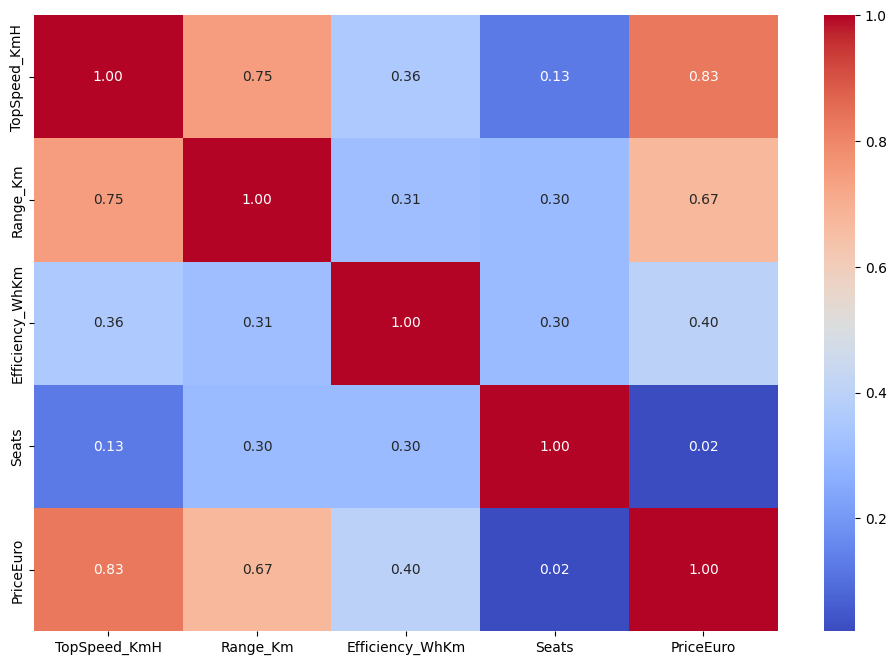

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 8))

# Crear el mapa de calor de la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

# Mostrar el gráfico
plt.show()


- Alta correlación entre la TopSpeed_KMH (velocida máxima vehículo en Km/hr) y el precio del vehículo
- Alta correlación entre TopSpeed_KMH y Range_KM (autonomía del vehículo con una carga completa) y entre el precio del vehículo en euros y el Range_KM.
- Al revisar la totalidad de segmentos de vehículos electricos, la variable PriceEuro se correlaciona muy poco con la eficiencia dle vehículo (Efficiency_WhKm), lo que nos indica que deberíamos extraer del total los segmentos que no son utilizados para transporte de vehículos.
- Casi no existe correlación entre precio del vehículo y cantidad de asientos, revisar por segmento.

In [20]:
df1_copy.Segment.value_counts()

Segment
C    30
B    22
D    15
F    12
E    10
A     7
N     6
S     1
Name: count, dtype: int64

In [21]:

# Crear un DataFrame filtrado que excluye los segmentos "E", "F", "S", y "N"
df_taxi_segments = df1[(df1['Segment'].isin(['C', 'D']))]

# Calcular la matriz de correlación para las columnas seleccionadas en el DataFrame filtrado
correlation_matrix2 = df_taxi_segments[['TopSpeed_KmH', 'Range_Km', 'Efficiency_WhKm', 'Seats', 'PriceEuro']].corr()

# Mostrar la matriz de correlación
correlation_matrix2

,TopSpeed_KmH,Range_Km,Efficiency_WhKm,Seats,PriceEuro
TopSpeed_KmH,1.000000,0.522262,0.037547,0.426773,0.696819
Range_Km,0.522262,1.000000,0.367360,0.063522,0.670387
Efficiency_WhKm,0.037547,0.367360,1.000000,-0.071573,0.622296
Seats,0.426773,0.063522,-0.071573,1.000000,0.277044
PriceEuro,0.696819,0.670387,0.622296,0.277044,1.000000


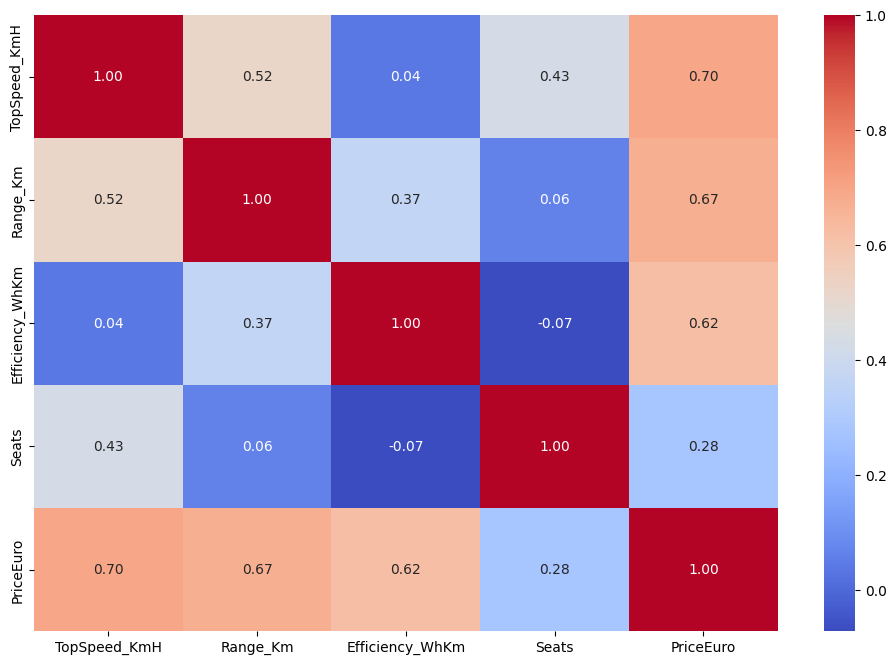

In [22]:
# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 8))

# Crear el mapa de calor de la matriz de correlación
sns.heatmap(correlation_matrix2, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

# Mostrar el gráfico
plt.show()

Eliminando los segmentos E (ejecutivo), F: lujo, S: deportivo, N: vehículos comerciales o específicos que no son para pasajeros, disminuye un poco la correlación entre precio y velocidad máxima, y aumenta la correlación entre precio y eficiencia del vehículo, en línea con lo que se busca un vehículo destinado al trasnporte de pasajero: alta autonomía y alta eficiencia a mayor precio.

Distribuición de variables

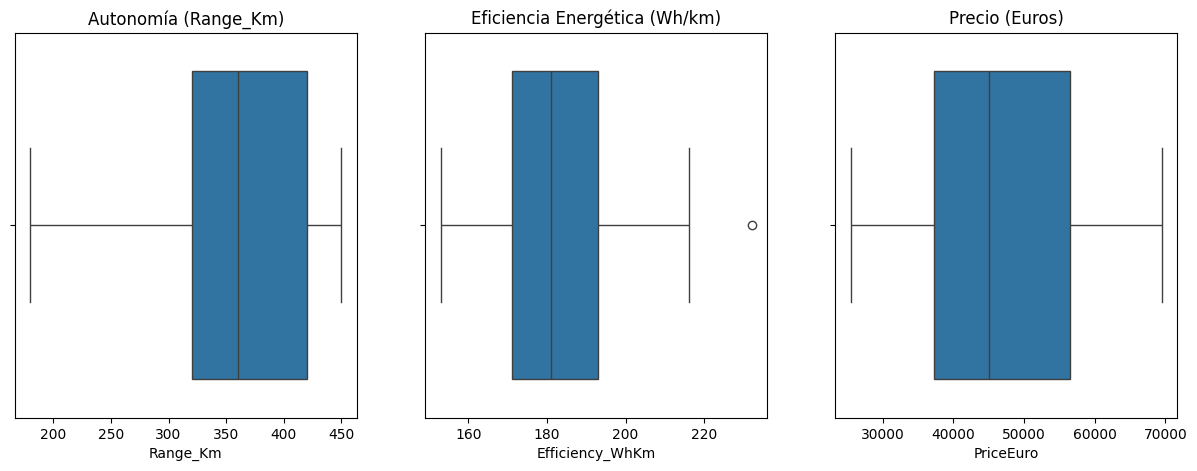

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear gráficos de caja para identificar outliers en autonomía, eficiencia y precio
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=df_taxi_segments, x='Range_Km')
plt.title('Autonomía (Range_Km)')

plt.subplot(1, 3, 2)
sns.boxplot(data=df_taxi_segments, x='Efficiency_WhKm')
plt.title('Eficiencia Energética (Wh/km)')

plt.subplot(1, 3, 3)
sns.boxplot(data=df_taxi_segments, x='PriceEuro')
plt.title('Precio (Euros)')

plt.show()


In [24]:
# Calcular el IQR y eliminar outliers en Range_Km, Efficiency_WhKm , PriceEuro, TopSpeed_KMH
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[column] >= Q1 - 1.5 * IQR) & (df[column] <= Q3 + 1.5 * IQR)]

# Aplicar la función para eliminar outliers en cada columna relevante
df_taxi_segments = remove_outliers(df_taxi_segments, 'Range_Km')
df_taxi_segments = remove_outliers(df_taxi_segments, 'Efficiency_WhKm')
df_taxi_segments = remove_outliers(df_taxi_segments, 'PriceEuro')
df_taxi_segments = remove_outliers(df_taxi_segments, 'TopSpeed_KmH')


In [ ]:
df_taxi_segments.describe()

,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,Seats,PriceEuro
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,7.389744,168.666667,345.512821,183.769231,4.948718,45146.461538
std,1.633658,17.117755,75.583649,15.178693,0.223456,11434.306123
min,4.000000,140.000000,180.000000,153.000000,4.000000,25500.000000
25%,6.250000,160.000000,305.000000,171.500000,5.000000,35816.000000
50%,7.300000,160.000000,350.000000,181.000000,5.000000,45000.000000
75%,9.000000,180.000000,405.000000,193.500000,5.000000,54237.500000
max,10.000000,210.000000,450.000000,216.000000,5.000000,69484.000000


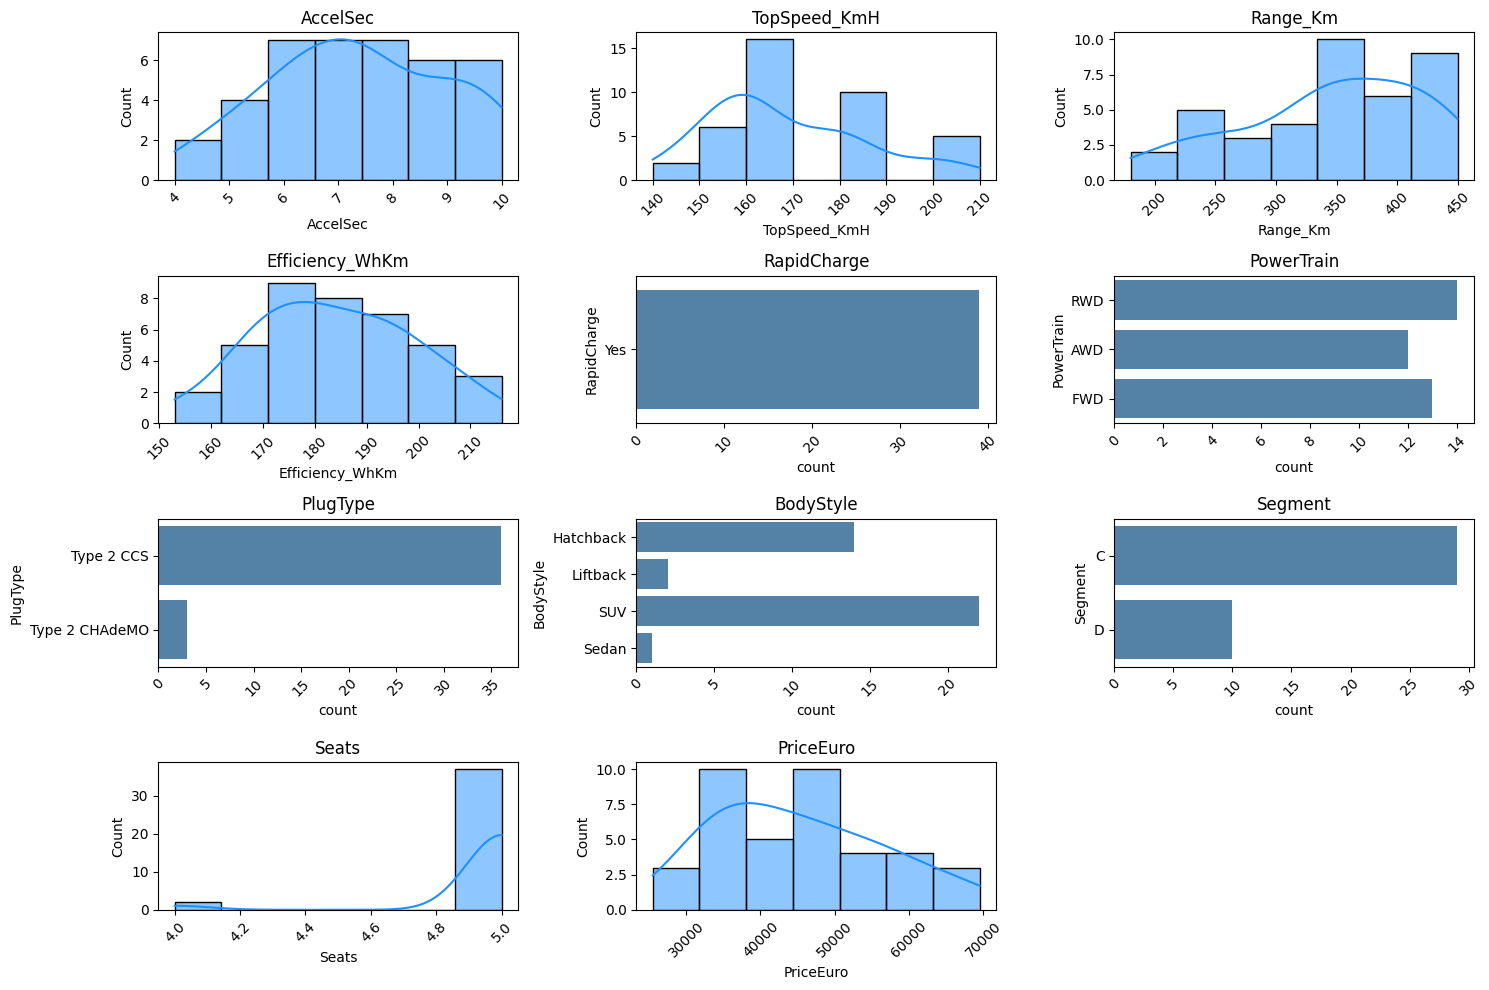

In [25]:

def plot_distribution(data_df, cols=5, width=15, height=10):
    # Función para graficar la distribución de cada columna en el dataset
    # Crear una figura con el tamaño definido por los parámetros width y height
    fig = plt.figure(figsize=(width, height))
    
    # Calcular el número de filas necesarias para acomodar todas las columnas en la gráfica
    # Se utiliza math.ceil para redondear hacia arriba en caso de que no sea divisible por cols
    rows = math.ceil(float(data_df.shape[1]) / cols)
    # Iterar sobre cada columna en el dataset
    for i, column in enumerate(data_df.columns):
        # Crear subplots, añadiendo cada uno en su posición dentro de la cuadrícula de filas y columnas
        ax = fig.add_subplot(rows, cols, i + 1)
        
        # Establecer el título de cada subplot como el nombre de la columna actual
        ax.set_title(column)
        
        # Verifica si la columna es categórica (tipo 'object')
        if data_df.dtypes[column] == object:
            # Usar un gráfico de barras (countplot) para columnas categóricas
            sns.countplot(data=data_df, y=column, ax=ax, color='steelblue')
            # Rotar los ticks del eje X para mejorar la visualización en caso de nombres largos
            plt.xticks(rotation=45)
        else:
            # Usar un histograma con KDE (estimación de densidad) para columnas numéricas
            sns.histplot(data_df[column], ax=ax, kde=True, color= 'dodgerblue')
            # Rotar los ticks del eje X para mejorar la visualización
            plt.xticks(rotation=45)
    
    # Ajustar el layout de la figura para evitar solapamientos entre subplots
    plt.tight_layout()
df=df_taxi_segments[['AccelSec', 'TopSpeed_KmH', 'Range_Km', 'Efficiency_WhKm', 'RapidCharge', 'PowerTrain', 'PlugType', 'BodyStyle', 'Segment', 'Seats', 'PriceEuro']]
plot_distribution(df, cols=3)

Características finales segmento autos eléctricos tipo transporte pasajeros , removiendo outliers:

- Promedio de Aceleración de 0 a 100 km/h: 7,4 segundos.  
- Velocidad Máxima promedio: 168.6 km/h  
- Autonomía promedio en KM= 345 KM  
- Carga Rápida.  
- Tipo de conectores característicos: 2 CCS, 2 CHAdeMO  
- Bodystyle: se distribuyen entre SUV Hastchback, LiftBack, Sedan.  
- Segemntos seleccionados: C, compacto y M: Mediano (estándar europeo)  
- Asisentos: 5 en promedio.  
- Precio promedio en euros: 45000 euros.



In [26]:
df_taxi_segments.to_csv('ElectricCar_TaxiSegments.csv')